In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cells = pd.read_csv('data/cells_no_repeats.csv', index_col=0)
display(cells.head())

,cell_type,pt_root_id,pt_x,pt_y,pt_z
Unnamed: 0,,,,,
0,23P,864691135639004475,71136,110528,20220
1,23P,864691135771677771,72576,108656,20291
2,23P,864691135864089470,79632,121456,16754
3,23P,864691135560505569,80128,124000,16563
4,23P,864691136315868311,80144,126928,16622


In [30]:
celltype_counts = cells['cell_type'].value_counts().sort_index()
display(celltype_counts)

cell_type
23P      17308
4P       12969
5P-ET     1429
5P-IT     8576
5P-NP      437
6P-CT     5414
6P-IT    10076
Name: count, dtype: int64

In [3]:
id_to_ct_dict = {}
for i, cell in cells.iterrows():
    id_to_ct_dict[cell['pt_root_id']] = cell['cell_type']

In [49]:
# Specify k
k = 3

In [50]:
# Import k-dependent data
sequences = pd.read_csv(f'data/real_sequences/sequences_k{k}.csv', index_col=0)
display(sequences.head())

,sequence_rank_0,sequence_rank_1,sequence_rank_2
cluster_id,,,
0,864691135348297687,864691136418647703,864691135474761792
1,864691136388590711,864691136388590711,864691136388590711
2,864691135761545526,864691135761545526,864691136812041331
3,864691135772039931,864691136903065778,864691136378754261
4,864691136056701144,864691136422832687,864691135866412566


In [51]:
sequences_ct = sequences.copy()
sequences_ct = sequences_ct.apply(lambda x: x.map(id_to_ct_dict))
display(sequences_ct.head())

,sequence_rank_0,sequence_rank_1,sequence_rank_2
cluster_id,,,
0,4P,23P,5P-IT
1,23P,23P,23P
2,23P,23P,23P
3,6P-CT,5P-IT,5P-ET
4,6P-IT,6P-IT,6P-CT


In [52]:
# Plot the number of times each cell type appears in the sequences
ct_counts = sequences_ct.values.flatten()
ct_counts = pd.Series(ct_counts).value_counts()
ct_counts = ct_counts.sort_index()
display(ct_counts)

23P      86334
4P       94028
5P-ET    20265
5P-IT    68246
5P-NP     1565
6P-CT    25238
6P-IT    36676
Name: count, dtype: int64

In [53]:
sequence_participation = ct_counts / celltype_counts
display(sequence_participation)

23P       4.988098
4P        7.250212
5P-ET    14.181246
5P-IT     7.957789
5P-NP     3.581236
6P-CT     4.661618
6P-IT     3.639936
Name: count, dtype: float64

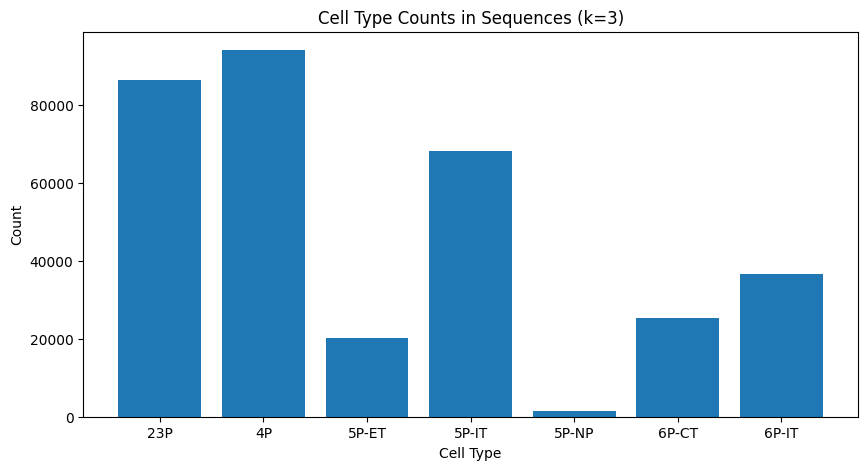

In [54]:
# Plot ct_counts
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(ct_counts.index, ct_counts.values)
ax.set_xlabel('Cell Type')
ax.set_ylabel('Count')
ax.set_title(f'Cell Type Counts in Sequences (k={k})')
# plt.savefig(f'plots/cell_type_sequences_k{k}.png')
plt.show()

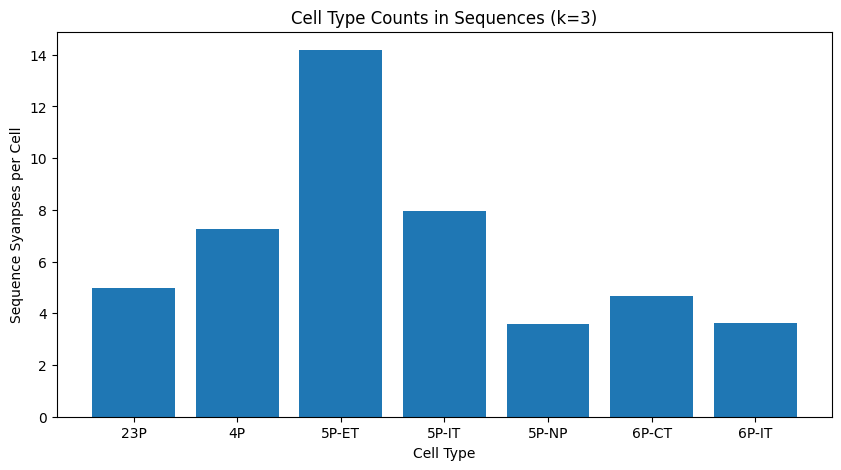

In [55]:
# Plot sequence participation correcting for cell type frequency
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(sequence_participation.index, sequence_participation.values)
ax.set_xlabel('Cell Type')
ax.set_ylabel('Sequence Syanpses per Cell')
ax.set_title(f'Cell Type Counts in Sequences (k={k})')
plt.savefig(f'plots/sequence_participation_k{k}.png')
plt.show()